## BE - Le modèle linéaire pour l'apprentissage machine

### Louis HOURCADE 

## Lecture, Extraction et visualisation des données

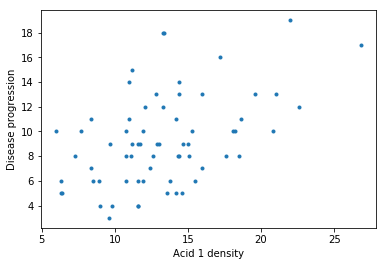

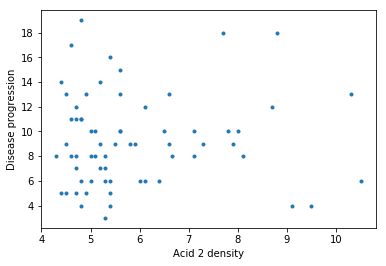

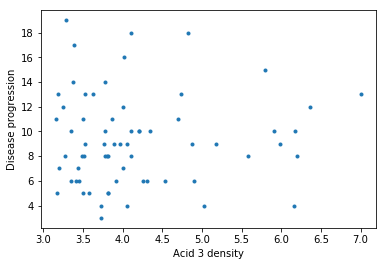

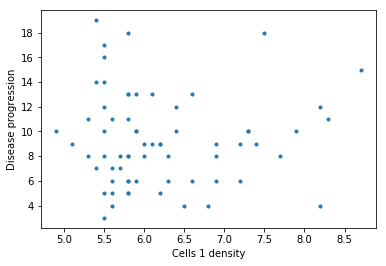

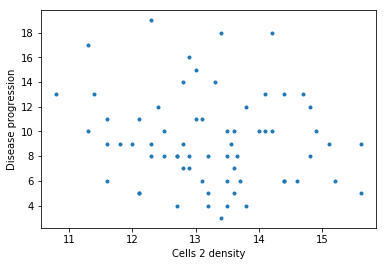

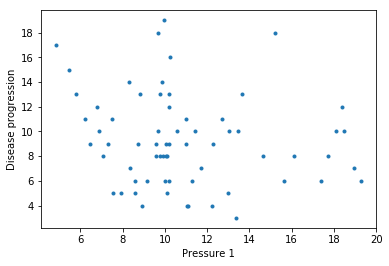

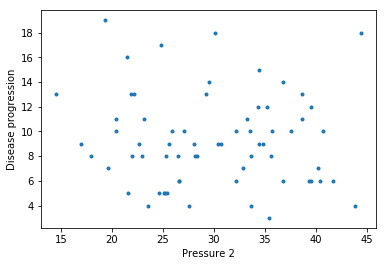

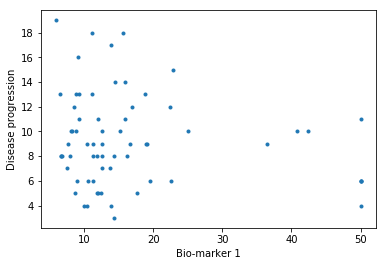

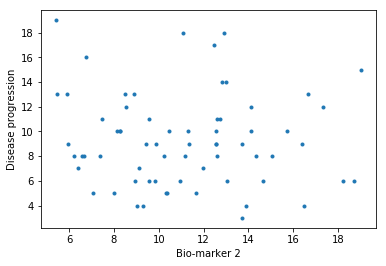

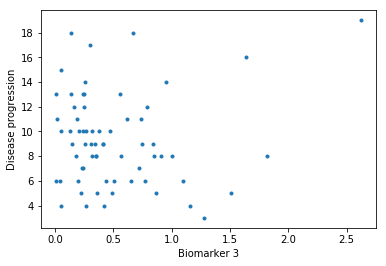

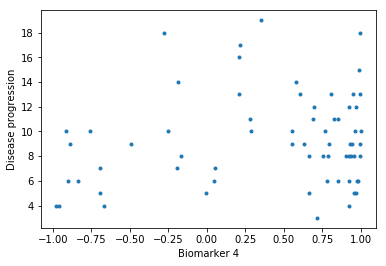

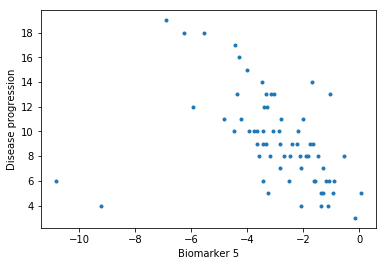

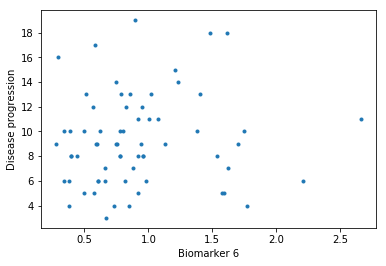

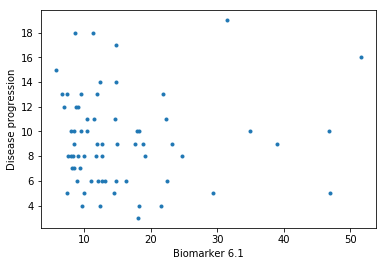

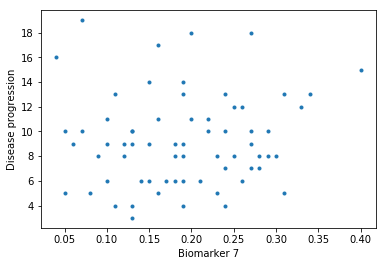

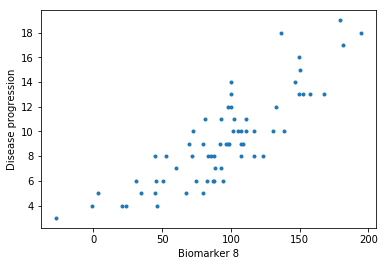

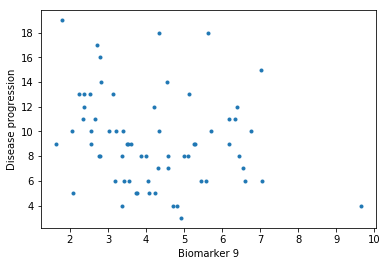

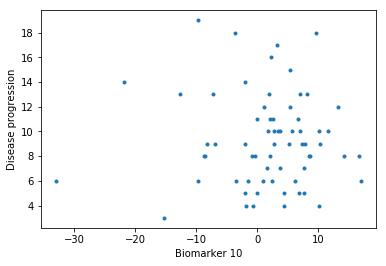

In [15]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

dataframe=pandas.read_csv("MedicalData1.csv",sep=';',decimal=b',')

listColNames=list(dataframe.columns)

XY=dataframe.values
ColNb_Y=listColNames.index('Disease progression')


Y=XY[:,ColNb_Y].reshape((XY.shape[0],1))   #reshape is to make sure that Y is a column vector
X = np.delete(XY, ColNb_Y, 1)

X_scaled = preprocessing.scale(X)

listColNames.pop(ColNb_Y)     #to make it contains the column names of X only


for Col in range(len(listColNames)):
  plt.plot(X[:,Col],Y[:],'.')
  plt.xlabel(listColNames[Col])
  plt.ylabel('Disease progression')
  plt.show()

### QUESTION 1 : Observez les donnees unes par unes. Est-ce que vous identifiez visuellement des liens entre certaines variables et la variable 'Disease progression'. Si oui, lesquels ?

Oui, ces graphes laissent suggérer des relations entre certaines variables et la variable 'Disease progression'. 
D'une part, deux variables semblent être corrélées positivement avec la variable 'Disease progession'. Ces deux variables sont 'Biomarker 8' et 'Acid 1 density'. La corrélation entre 'Biomarker 8' et 'Disease progession' semble sur ces graphes plus forte que la corrélation entre 'Acid 1 density' et 'Disease progression', étant donné que dans le premier cas, les points se repartissent mieux selon une droite.
D'autre part, il semble qu'il y ait une corrélation négative entre 'Biomarker 5' et 'Disease progression'. On remarque cependant deux mesures anormales sur ce graphe (les deux points en bas à gauche) car ceux-ci ne sont pas du tout en accord avec le modèle linéaire, contrairement au reste des observations.


### QUESTION 2 :   On se demande si il est possible de predire le niveau de 'Disease progression' à partir de de la variable 'Acid 1 density'. 

### QUESTION 2.1 : Effectuez une regression lineaire simple entre ces deux variables et predisez ensuite les valeurs de 'Disease progression' a l'aide de 'Acid 1 density'. Vous pourrez evaluer la qualité des predictions a l'aide du coefficient de determination R2.

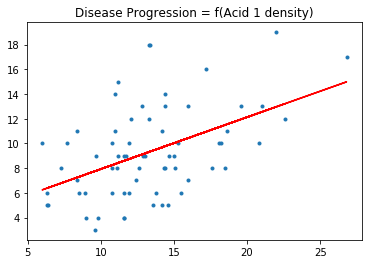

Estimation des coefficients B0 et B1: b0 = 3.72, b1 = 0.42
Coefficient de détermination: R2 = 0.23


In [2]:
from sklearn import linear_model

# Initialisation du paramètre n
n = Y.shape[0]

# Initialisation du vecteur X_acid1 qui contiendra les n (=66) observations de la variable 'Acid 1 density'
X_acid1 = X[:, listColNames.index("Acid 1 density")].reshape(n,1)

# Regression linéaire simple avec 'Acid 1 density' expliquant 'Disease progression'
lr_acid1 = linear_model.LinearRegression()
lr_acid1.fit(X_acid1, Y)

# Affichage des graphes
fig = plt.figure()
plt.plot(X_acid1, Y, '.')
plt.plot(X_acid1, lr_acid1.predict(X_acid1), 'r-')
plt.title("Disease Progression = f(Acid 1 density)")
plt.show()

# Résultats de la régression simple. Les résultats ont été arrondi pour une meilleure lisibilité     
r2_score = round(lr_acid1.score(X_acid1,Y),2)
b0 = round(float(lr_acid1.intercept_),2)
b1 = round(float(lr_acid1.coef_),2)
print("Estimation des coefficients B0 et B1: b0 = " + str(b0) + ", b1 = " + str(b1))
print("Coefficient de détermination: R2 = " + str(r2_score))

Le score R2 est plutôt faible. La qualité du modèle n'est donc pas très bonne.

###  QUESTION 2.2 : Evaluez la stabilite des predictions a l'aide d'une methode de validation croisee de type 4-folds.

In [3]:
from sklearn.model_selection import KFold

# Nous allons effectuer une méthode K-folds en découpant les données en 4.
kf = KFold(n_splits=4)

# b0 et b1 sont deux listes qui contiendront les coefficients estimés b0 et b1 lors de chaque itération de la 
# méthode K-folds. r2 contiendra la liste des coefficients de détermination
b0 = []
b1 = []
r2 = []

# On réalise une régression linéaire simple sur chaque subdivision de X_acid1 pour avoir b0 et b1
lr = linear_model.LinearRegression()
for train, test in kf.split(X_acid1):
    X_train = X_acid1[train]
    Y_train = Y[train]
    X_test = X_acid1[test]
    Y_test = Y[test] 
    lr.fit(X_train, Y_train)
    b0.append(float(lr.intercept_))
    b1.append(float(lr.coef_))
    r2.append(lr.score(X_test,Y_test))
    
# Affichage des résultats
print("liste des b0: " + str([ round(coef, 2) for coef in b0]))
print("liste des b1: " + str([ round(coef, 2) for coef in b1]))
print("liste des R2: " + str([ round(score, 2) for score in r2]))

# Analyse de la stabilité
print("Moyenne des b0: " + str(round(np.mean(b0),2)))
print("Ecart-type des b0: " + str(round(np.std(b0),2)))
print("Moyenne des b1: " + str(round(np.mean(b1),2)))
print("Ecart-type des b1: " + str(round(np.std(b1),2)))
print("Moyenne des R2: " + str(round(np.mean(r2),2)))
print("Ecart-type des R2: " + str(round(np.std(r2),2)))

liste des b0: [2.97, 4.29, 4.41, 2.86]
liste des b1: [0.48, 0.37, 0.38, 0.47]
liste des R2: [-0.03, 0.26, 0.37, 0.14]
Moyenne des b0: 3.63
Ecart-type des b0: 0.72
Moyenne des b1: 0.43
Ecart-type des b1: 0.05
Moyenne des R2: 0.18
Ecart-type des R2: 0.15


Dans les quatres cas, le coefficient de détermination R2 est faible, ce qui traduit une mauvaise qualité du modèle linéaire. Ce dernier n'est pas non plus très stable, les ecart-types sont importants.

### QUESTION 2.3 : Auriez-vous eu de meilleurs resultats en predisant 'Disease progression' a l'aide de la variable 'Biomarker 8' ou 'Pressure 1'?

Après observation des graphes affichés au début de ce BE, nous pouvons déjà penser que les résultats seront bien meilleurs si on essaye de prédire 'Disease progression' à l'aide de la variable 'Biomarker 8'. En effet, lorsqu'on trace 'Disease progression' en fonction de 'Biomarker 8', on remarque que les points se répartissent approximativement selon un droite croissante. Ce n'est pas du tout le cas pour 'Pressure 1' où nous n'observons aucun comportement linéaire. Nous allons vérifier tout cela en réalisant la régression linéaire simple sur les deux variables.

Rappelle des graphes:


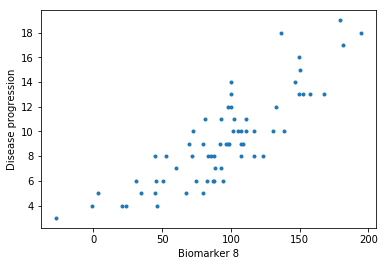

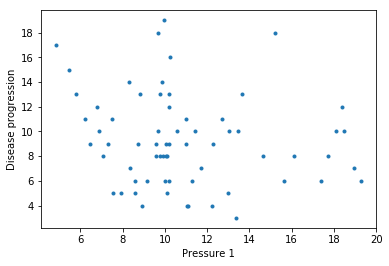

Résultats avec la variable 'Biomarker 8':
Estimation des coefficients B0 et B1: b0 = 2.65, b1 = 0.07
Coefficient de détermination: R2 = 0.72

Résultats avec la variable 'Pressure 1':
Estimation des coefficients B0 et B1: b0 = 11.32, b1 = -0.19
Coefficient de détermination: R2 = 0.03


In [4]:
# X_bio8 correspond au 66 observations de 'Biomarker 8' alors que X_pressure1 correspond aux 
# 66 observations de 'Pressure 1'
X_bio8 = X[:, listColNames.index("Biomarker 8")].reshape(n,1)
X_pressure1 = X[:, listColNames.index("Pressure 1")].reshape(n,1)

# On rappelle les deux graphes:
print("Rappelle des graphes:")
plt.plot(X_bio8, Y, '.')
plt.xlabel('Biomarker 8')
plt.ylabel('Disease progression')
plt.show()
plt.plot(X_pressure1, Y, '.')
plt.xlabel('Pressure 1')
plt.ylabel('Disease progression')
plt.show()

# On effectue ensuite les régressions linéaires
lr_bio8 = linear_model.LinearRegression()
lr_pressure1 = linear_model.LinearRegression()
lr_bio8.fit(X_bio8, Y)
lr_pressure1.fit(X_pressure1, Y)

## Résultats

# Avec Biomarker 8
print("Résultats avec la variable 'Biomarker 8':")
r2_score = round(lr_bio8.score(X_bio8, Y),2)
b0 = round(float(lr_bio8.intercept_),2)
b1 = round(float(lr_bio8.coef_),2)
print("Estimation des coefficients B0 et B1: b0 = " + str(b0) + ", b1 = " + str(b1))
print("Coefficient de détermination: R2 = " + str(r2_score) + "\n")

# Avec Pressure 1
print("Résultats avec la variable 'Pressure 1':")
r2_score = round(lr_pressure1.score(X_pressure1, Y),2)
b0 = round(float(lr_pressure1.intercept_),2)
b1 = round(float(lr_pressure1.coef_),2)
print("Estimation des coefficients B0 et B1: b0 = " + str(b0) + ", b1 = " + str(b1))
print("Coefficient de détermination: R2 = " + str(r2_score))

Les résultats sont donc en accord avec ce que l'on pensait initialement. Le coefficient de détermination de la régression faite avec 'Pressure 1' est très mauvais alors que celui de la régression faite avec 'Biomarker 8' est bon. Les résultats sont donc bien meilleurs avec 'Biomarker 8'.

### QUESTION 2.4 : Peut-on enfin dire si on observe une relation significative entre 'Disease progression' et (independament) 'Acid 1 density' ou 'Biomarker 8' ou 'Pressure 1'. On peut le valider en testant si les coefficients des pentes obtenues entre 'Disease progression' et chacune de ses trois variables par regression lineaire simples sont significativement differentes de 0.


In [5]:
from scipy import stats
from math import sqrt

# Dans les trois cas, on va faire un test de student afin de tester si la pente est significativement différente de 0
# Hypothèse HO: "Beta1 = 0"
# Il suffit alors de calculer dans chaque cas la statistique de test suivant le loi de student à n-2 degrés de liberté

# Variable 'Acid 1 Density'
lr_acid1 = linear_model.LinearRegression()
lr_acid1.fit(X_acid1, Y)
Y_pred_acid1 = lr_acid1.predict(X_acid1)
b1_acid1 = lr_acid1.coef_
s2 = (1./(n-2))*np.sum((Y-Y_pred_acid1)**2)
sx2 = (1./(n-1))*np.sum((X_acid1-np.mean(X_acid1))**2)
t = b1_acid1/sqrt(s2 / ((n-1)*sx2 ))
print("p-value d'un test de student pour 'Acid Density 1' : " +str(float(2*stats.t.sf(abs(t),n-2))))               

# Variable 'Biomarker 8'
lr_bio8 = linear_model.LinearRegression()
lr_bio8.fit(X_bio8, Y)
Y_pred_bio8 = lr_bio8.predict(X_bio8)
b1_bio8 = lr_bio8.coef_
s2 = (1./(n-2))*np.sum((Y-Y_pred_bio8)**2)
sx2 = (1./(n-1))*np.sum((X_bio8-np.mean(X_bio8))**2)
t = b1_bio8/sqrt(s2 / ((n-1)*sx2 ))
print("p-value d'un test de student pour 'Biomarker 8' : " +str(float(2*stats.t.sf(abs(t),n-2))))  

# Variable 'Pressure 1'
lr_pressure1 = linear_model.LinearRegression()
lr_pressure1.fit(X_pressure1, Y)
Y_pred_pressure1 = lr_pressure1.predict(X_pressure1)
b1_pressure1 = lr_pressure1.coef_
s2 = (1./(n-2))*np.sum((Y-Y_pred_pressure1)**2)
sx2 = (1./(n-1))*np.sum((X_pressure1-np.mean(X_pressure1))**2)
t = b1_pressure1/sqrt(s2 / ((n-1)*sx2 ))
print("p-value d'un test de student pour 'Pressure 1' : " +str(float(2*stats.t.sf(abs(t),n-2))))

p-value d'un test de student pour 'Acid Density 1' : 5.130502783732614e-05
p-value d'un test de student pour 'Biomarker 8' : 3.1624860150065215e-19
p-value d'un test de student pour 'Pressure 1' : 0.16111033249605566


Dans ces trois cas, l'hypothèse H0 est "Beta1 = 0". Dans les deux premiers cas ('Acid 1 Density' et 'Biomarker 8') la p-value est très faible. On rejette donc H0 et on conclut que le coefficient de pente est significativement différent de 0 pour ces deux variables. La p-value étant plus faible pour 'Biomarker 8', on a moins de chance de se tromper en faisant cette conclusion pour cette variable, comparé à 'Acid 1 Density'.
Dans le cas de 'Pressure 1', la p-value est plutôt élevée. On ne peut donc pas rejeter l'hypothèse H0. On en conclut que le coefficient de pente n'est pas significativement différent de 0.

### QUESTION 3 :   On s'interesse maintenant au lien entre la variable 'Disease progression' et 'Biomarker 5'. On peut remarquer que ces donnees contiennent deux valeurs aberrantes.

### QUESTION 3.1 : Quelles sont les valeurs aberrantes et quel va etre leur impact lors de l'estimation d'une relation lineaire entre ces deux variables ?

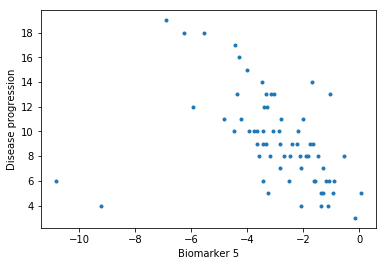

indexes des observations aberrantes : [29 49]
première observation aberrantes : (-10.82853664, 6.0)
deuxième observation aberrantes : (-9.21027242, 4.0)


In [6]:
# Le vecteur X_bio5 contient les 66 observations de la variable 'Biomarker 5'
X_bio5 = X[:, listColNames.index("Biomarker 5")].reshape(n,1)

# On affiche le nuage de points avec 'Biomarker 8' en abscisses et 'Disease progression' en ordonnées
plt.plot(X_bio5, Y, '.')
plt.xlabel('Biomarker 5')
plt.ylabel('Disease progression')
plt.show()
print("indexes des observations aberrantes : " + str(np.where(X_bio5 < -8)[0]))
print("première observation aberrantes : (" + str(float(X_bio5[np.where(X_bio5 < -8)[0][0]])) +", "+str(float(Y[np.where(X_bio5 < -8)[0][0]]))+")")
print("deuxième observation aberrantes : (" + str(float(X_bio5[np.where(X_bio5 < -8)[0][1]])) +", "+str(float(Y[np.where(X_bio5 < -8)[0][1]]))+")")

On voit bien sur ce graphe les deux valeurs aberrantes. Ce sont les deux points en bas à gauche, de coordonnées (-10.8, 6) et (-9.2, 4). Ils peuvent venir fausser le modèle. En effet leur présence influe sur les estimations des coefficients Beta0 et Beta1. Avec ces deux points, on obtient aussi un coefficient de détermination R2 qui est plus faible.

### QUESTION 3.2 : Definissez une procedure de detection automatique de ces variables basee sur la distance de Cook.

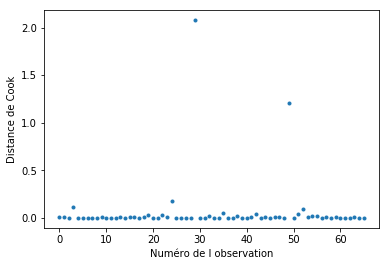

Plus grande distance de Cook : 2.0769216420233665 , obtenue avec i = 29
Deuxième plus grande distance de Cook : 1.2121580611911662 , obtenue avec i = 49

Premier couple aberrant: (-10.83, 6.0)
Deuxième couple aberrant: (-9.21, 4.0)


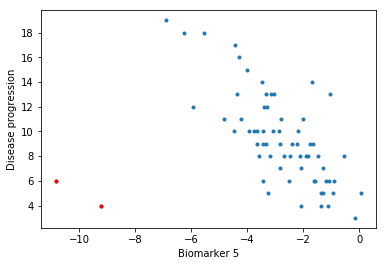

In [7]:
# On commence par faire la régression linéaire et on calcul le s_square qui sera ensuite utilisé pour calculer les 
# disances de Cook
lr = linear_model.LinearRegression()
lr.fit(X_bio5, Y)
Y_predict = lr.predict(X_bio5)
ssquare = (1/(n-2))*np.sum((Y_predict-Y)**2)

# D est la liste qui contiendra la distance de Cook de chaque observation
D = []

# On fait une régression linéaire en supprimant une observation à chaque itération. On observe ainsi l'influence de 
# cette observation sur le modèle
for i in range(n):
    X_del_i = np.delete(X_bio5,i).reshape(n-1,1)
    Y_del_i = np.delete(Y,i).reshape(n-1,1)
    lr = linear_model.LinearRegression()
    lr.fit(X_del_i, Y_del_i)
    D.append((1/(2*ssquare))*sum((lr.predict(X_bio5)-Y_predict)**2))

# Avec la question précédente, on sait qu'il y a deux valeurs aberrantes. La distance de Cook sera maximale pour ces
# deux observations. On recherche donc les deux valeurs maximales dans D afin d'identifier ces deux observations

# On affiche dans un premier temps les distances de Cook
plt.figure()
plt.plot(range(n),D, ".")
plt.xlabel('Numéro de l observation')
plt.ylabel('Distance de Cook')
plt.show()

# On trie D par ordre décroissant et on garde les deux premières valeurs
D_sort = sorted(D, reverse = True)
maxi_D = float(D_sort[0])
maxi_2D = float(D_sort[1])

print("Plus grande distance de Cook : "+str(maxi_D) +" , obtenue avec i = "+str(D.index(maxi_D)))
print("Deuxième plus grande distance de Cook : "+str(maxi_2D) +" , obtenue avec i = "+str(D.index(maxi_2D)) + "\n")

# On en déduit l'identité des deux observations aberrantes
print("Premier couple aberrant: ("+str(round(float(X_bio5[29]),2))+", "+str(float(Y[29]))+")")
print("Deuxième couple aberrant: ("+str(round(float(X_bio5[49]),2))+", "+str(float(Y[49]))+")")

plt.figure()
plt.plot(X_bio5,Y, ".")
plt.plot(X_bio5[29],Y[29], ".", color = "r")
plt.plot(X_bio5[49],Y[49], ".", color = "r")
plt.xlabel('Biomarker 5')
plt.ylabel('Disease progression')
plt.show()

### QUESTION 3.3 : Pourriez vous plus simplement detecter ces observations aberrantes a l'aide des residus ? Si oui, decrivez comment, sans necessairement coder la solution.

Les observations aberrantes sont celles pour lesquelles on obtient des résidus très grands. En effet ces points sont très éloignés de la droite qui modèlise la relation entre nos deux variables. Il est donc également possible de detecter les observations aberrantes grace aux résidus.Il suffit pour cela de voir pour quelles observations les résidus sont les plus importants.

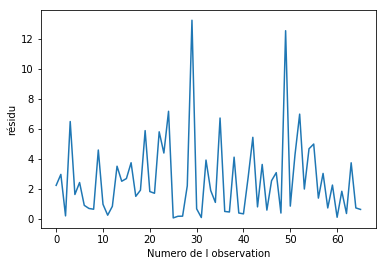

Indice de la première observation aberrante : 29
Indice de la deuxième observation aberrante : 49


In [8]:
# Liste qui contiendra la valeur des résidus pour chaque observation
residus = []

# Pour chaque observation, on l'enlève du modèle, on fait la regression sur le reste des données et on calcul 
# le résidu de l'observation enlevée en calculant X_bio5[i] - lr.predict(X_bio[i])
lr = linear_model.LinearRegression()
for i in range(n):
    X_del_i = np.delete(X_bio5,i).reshape(n-1,1)
    Y_del_i = np.delete(Y,i).reshape(n-1,1)
    lr.fit(X_del_i, Y_del_i)
    residus.append(abs(float(Y[i] -lr.predict(X_bio5[i].reshape(1,-1))))) # On prend la valeur absolue pour comparer plus facilement 

# Enfin, on affiche les résidus
plt.figure
plt.plot(range(n), residus)
plt.xlabel('Numero de l observation')
plt.ylabel('résidu')
plt.show()

print("Indice de la première observation aberrante : " + str(np.argmax(residus)))
residus[np.argmax(residus)] = 0
print("Indice de la deuxième observation aberrante : " + str(np.argmax(residus)))

### QUESTION 3.4 : Comment traiteriez-vous les donnees aberrantes dans le contexte de la regression lineaire entre 'Disease progression' et 'Biomarker 5' pour estimer un lien pertinent entre ces deux variables

Je pense qu'il est préférable de supprimer ces deux observations du jeu de données. En effet, leur répartition se distingue fortement de celle des autres (au moins pour la variable 'Biomarker 5') et notre modèle linéaire en est affecté. Il est possible que ces deux observations correspondent à des erreurs de mesure, d'où l'importance de les supprimer pour ne pas biaiser notre modèle linéaire.

In [9]:
# On supprime les observations numéro 29 et 49
X_clean = np.delete(X,[29,49], axis = 0)
Y_clean = np.delete(Y, [29,49], axis = 0)

# On en profite pour centrer et normer X, ce qui nous sera utile pour la suite
X_scaled = preprocessing.scale(X_clean)

### QUESTION 4 :   Une fois les observations aberrantes de 'Biomarker 5' traitees, on souhaite selectionner les variables de 'X' qui permettent de prédire au mieux 'Disease progression' a l'aide de la regression multiple regularisee.

### QUESTION 4.1 : Expliquez pourquoi vous effecturez cette procedure sur 'X_scaled' plutot que 'X' ?

Avant de réaliser notre regression linéaire multiple, il est important de centrer et de normer nos variables. En effet, après un bref coup d'oeil sur les données, on remarque que les variables n'ont ni la même moyenne ni la même variance. Cela peut donc venir fausser notre modèle linéaire qui risque de donner une plus grande importance aux variables ayant une grande variance.

### QUESTION 4.2 : Expliquez pourquoi vous regulariserez les coefficients estimes avec une regularisation de type LASSO plutot que RIDGE ?

Notre objectif dans cette question est d'effectuer une sélection de variables. Il est donc préférable pour cela d'utiliser une régression de type LASSO plutôt que RIDGE. En effet cette méthode pénalise la norme des coefficients Beta et non la norme au carré comme avec la méthode RIDGE. Avec la méthode RIDGE, on conserve donc les Beta dans la dérivée et c'est pour cela qu'il est plus rare d'avoir des coefficients Beta1 = 0: car quand ces derniers sont très petits, la dérivée et aussi très petite. Avec LASSO, on dérive une fonction valeur absolue ce qui permet d'attribuer plus aisaiment des coefficients Beta = 1 aux variables non significatives.
En revanche si on cherchait à faire uniquement de la prédiction, la méthode RIDGE serait plus adaptée.

### QUESTION 4.3 : Codez la procedure de selection des variables optimales en parametrant a la main le poids entre la qualite de prediction et le niveau de regularisation

In [10]:
from sklearn.linear_model import Lasso

n = Y_clean.shape[0]

# On réalise une régression avec une regularization de type LASSO et alpha = 0.1
alpha = 0.3
lasso_regressor = Lasso(alpha=alpha)
lasso_regressor.fit(X_scaled, Y_clean)

# Affichage des résultats
print("Coefficient de détermination R2 = " + str(lasso_regressor.score(X_scaled, Y_clean)))
print("Nombre de variables séléctionnées = " + str(sum(lasso_regressor.coef_ != 0)) + "\n")

print("Estimation du Beta de chaque variable:")
for i in range(len(lasso_regressor.coef_)):
    print(listColNames[i] + " : " + str(lasso_regressor.coef_[i]))

Coefficient de détermination R2 = 0.8057780218750606
Nombre de variables séléctionnées = 3

Estimation du Beta de chaque variable:
Acid 1 density : 0.1270362328817736
Acid 2 density : -0.0
Acid 3 density : -0.0
Cells 1 density : -0.0
Cells 2 density : -0.0
Pressure 1 : -0.0
Pressure 2 : -0.0
Bio-marker 1 : -0.0
Bio-marker 2 : -0.0
Biomarker 3 : 0.0
Biomarker 4 : 0.0
Biomarker 5 : -1.1871391207581325
Biomarker 6 : 0.0
Biomarker 6.1 : -0.0
Biomarker 7 : 0.0
Biomarker 8 : 2.052729753701871
Biomarker 9 : -0.0
Biomarker 10 : -0.0


### QUESTION 4.4 : Codez la procedure automatique de parametrisation de ce poids, de sorte a ce q'un maximum de trois variables soit typiquement selectionne et que la qualite de prediction soit optimale. Une procédure de validation croisee de type leave-one-out sera idealement utilisee. La selection des variables est-elle stable ?

In [11]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score

LOO = LeaveOneOut()

# On construit la liste des alpha que l'on va tester
# max_varbles est une liste qui pour chaque alpha, contiendra le nombre maximum de variables sélectionnées
# R2_moy est une liste qui pour chaque alpha, contiendra le coefficient de détermination moyen
alpha_list = np.arange(0.01,1,0.005)
max_variables = []
R2_list = []

# On parcourt alpha_list et on utilise la procédure Leave One Out. On rempli également les listes max_variables et
# R2_moy
for alpha in alpha_list:
    lasso_regressor = Lasso(alpha=alpha)
    y_test = []
    y_pred = []
    maxi = 0
    for train, test in LOO.split(X_scaled):
        X_train = X_scaled[train]
        Y_train = Y_clean[train]
        X_test = X_scaled[test]
        Y_test = Y_clean[test]
        lasso_regressor.fit(X_train, Y_train)
        y_test.append(Y_test[0])
        y_pred.append(lasso_regressor.predict(X_test))
        maxi = max(maxi, sum(lasso_regressor.coef_ != 0))
    R2_list.append(r2_score(y_test, y_pred))
    max_variables.append(maxi)
    
# On va maintenant chercher la valeur de alpha pour laquelle on a le meilleur coefficient de détermination et pour
# laquelle un maximum 3 variables sont sélectionnées
indice = 0
top_R2 = 0
for i in range(len(max_variables)):
    if max_variables[i] <= 3:
        if R2_list[i] > top_R2:
            indice = i
            top_R2 = R2_list[i]

# Affichage du résultat
print("alpha selectionné : " + str(alpha_list[indice]))
print("R2 moyen pour cet alpha : " + str(top_R2) + "\n")

# Pour tester la stabilité, on prend le alpha optimal et on regarde quelles sont les variables sélectionnées
alpha = alpha_list[indice]
print("Variables sélectionnées à chaque itération du LOO : ")
lasso_regressor = Lasso(alpha=alpha)
for train, test in LOO.split(X_scaled):
    X_train = X_scaled[train]
    Y_train = Y_clean[train]
    lasso_regressor.fit(X_train, Y_train)
    print(np.array(listColNames)[lasso_regressor.coef_ != 0])

alpha selectionné : 0.36499999999999994
R2 moyen pour cet alpha : 0.7709092434992578

Variables sélectionnées à chaque itération du LOO : 
['Acid 1 density' 'Biomarker 5' 'Biomarker 8']
['Acid 1 density' 'Biomarker 5' 'Biomarker 8']
['Acid 1 density' 'Biomarker 5' 'Biomarker 8']
['Acid 1 density' 'Biomarker 5' 'Biomarker 8']
['Acid 1 density' 'Biomarker 5' 'Biomarker 8']
['Acid 1 density' 'Biomarker 5' 'Biomarker 8']
['Acid 1 density' 'Biomarker 5' 'Biomarker 8']
['Acid 1 density' 'Biomarker 5' 'Biomarker 8']
['Acid 1 density' 'Biomarker 5' 'Biomarker 8']
['Acid 1 density' 'Biomarker 5' 'Biomarker 8']
['Acid 1 density' 'Biomarker 5' 'Biomarker 8']
['Acid 1 density' 'Biomarker 5' 'Biomarker 8']
['Acid 1 density' 'Biomarker 5' 'Biomarker 8']
['Acid 1 density' 'Biomarker 5' 'Biomarker 8']
['Acid 1 density' 'Biomarker 5' 'Biomarker 8']
['Acid 1 density' 'Biomarker 5' 'Biomarker 8']
['Acid 1 density' 'Biomarker 5' 'Biomarker 8']
['Acid 1 density' 'Biomarker 5' 'Biomarker 8']
['Acid 1 densit

On remarque que la sélection des variables est stable. Ce sont toujours les mêmes variables qui sont sélectionnées: 'Acid 1 density', 'Biomarker 5' et 'Biomarker 8'. Il n'y a que lors d'une seule itération que la variable 'Acid 1 density' n'est pas sélectionnée

### QUESTION 5 :   On s'interesse enfin au fichier 'MedicalData2.csv' et non 'MedicalData1.csv' qui contient une colonne qualitative supplementaire 'Pathology type'.

### QUESTION 5.1 : Quelles sont les differences entre les structures du fichier 'MedicalData2.csv' et du fichier 'MedicalData1.csv' en plus de cette colonne supplementaire

Dans ce nouveau fichier, en plus de la nouvelle variable qualitative, les séparateurs de colonnes sont des "," et des "." sont utilisés pour indiquer les nombres décimaux. Dans le premier fichier, les séparateurs étaient des ";" et les nombres décimaux étaient indiqués par des ",".

In [12]:
# Importation et affiche des données
dataframe2 = pandas.read_csv("MedicalData2.csv",sep=',',decimal=b'.')
print(dataframe2.head())

   Acid 1 density  Acid 2 density  Acid 3 density  Cells 1 density  \
0            11.6             6.4             4.3              7.2   
1            15.5            10.5             4.9              6.9   
2            15.3             6.5             4.2              6.4   
3            13.4             7.7             4.1              5.8   
4            16.0             5.2             3.2              5.7   

   Cells 2 density  Pressure 1  Pressure 2  Bio-marker 1  Bio-marker 2  \
0             14.4       19.26       39.32         50.00     13.040000   
1             13.7        8.57       36.78         22.57     18.713333   
2             13.6       13.48       25.90          8.25      8.246667   
3             14.2       15.23       44.36         11.09     11.093333   
4             12.8        8.37       19.62          7.44      6.386667   

   Biomarker 3  Biomarker 4  Biomarker 5  Biomarker 6  Biomarker 6.1  \
0         0.20       0.0440    -1.578984        2.209         

### QUESTION 5.2 : Est-ce qu'une variable semble bien expliquer la classe de 'Pathology type'. Quelle demarche vous semble la plus pertinente pour identifer cette variable ?

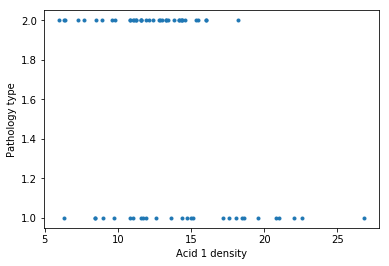

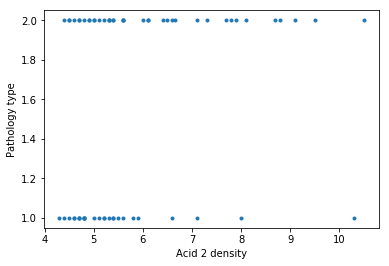

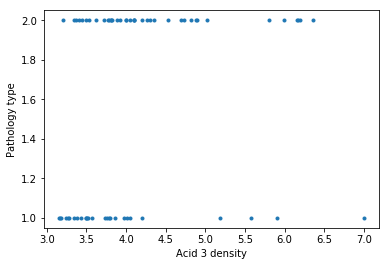

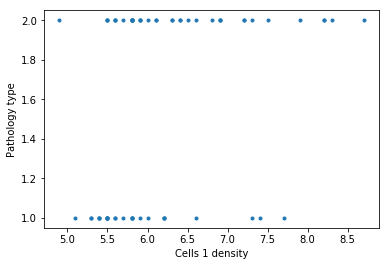

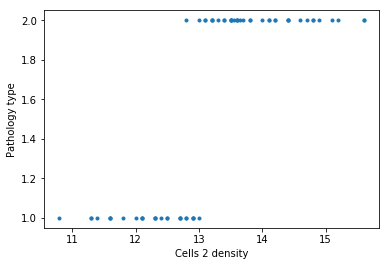

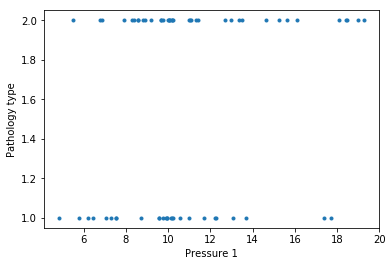

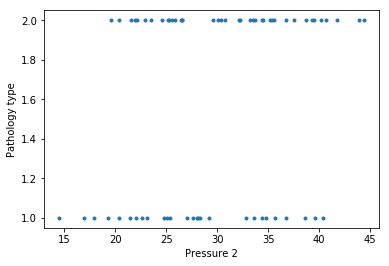

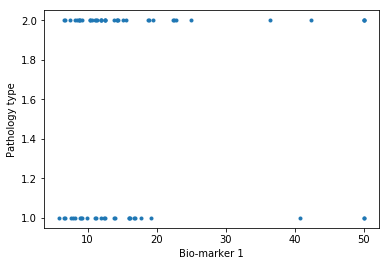

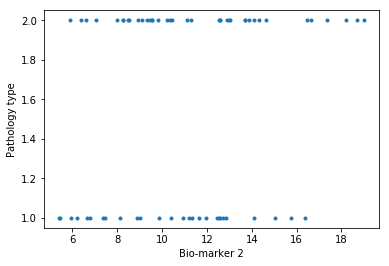

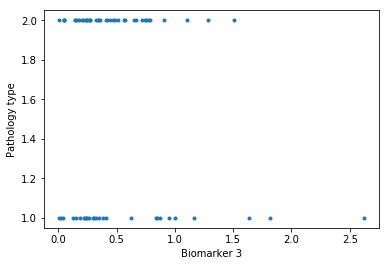

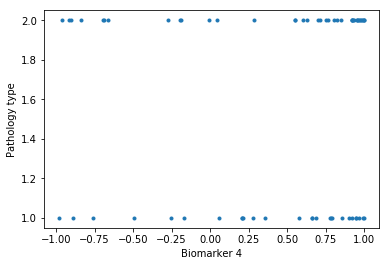

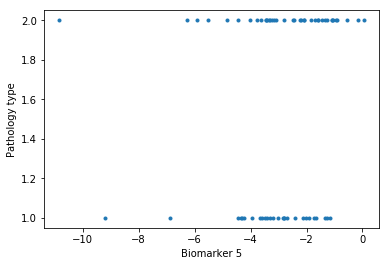

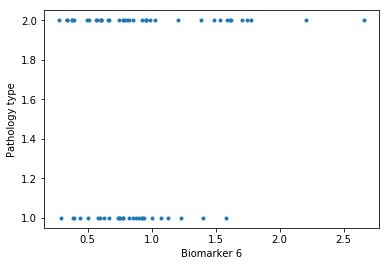

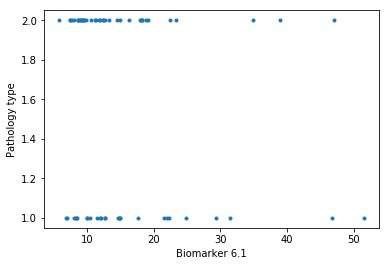

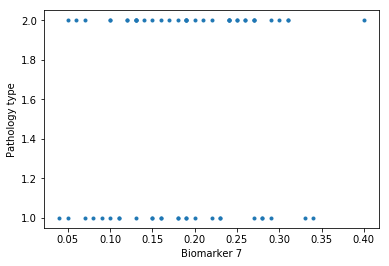

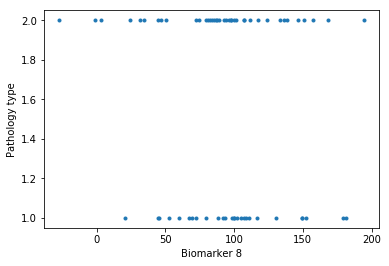

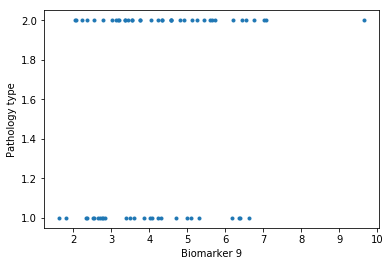

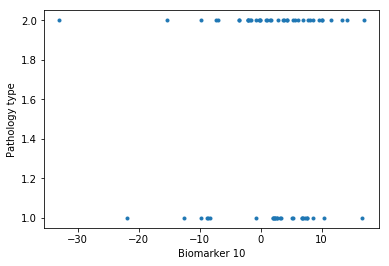

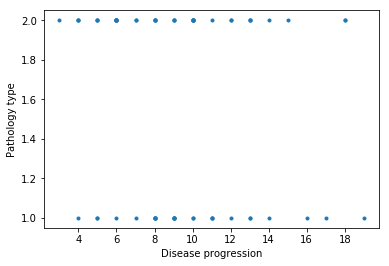

In [13]:
listColNames2=list(dataframe2.columns)

XY2=dataframe2.values
ColNb_Y2=listColNames2.index('Pathology type')

n2 = XY2.shape[0]

Y2=XY2[:,ColNb_Y2]
X2 = np.delete(XY2, ColNb_Y2, 1)

listColNames2.pop(ColNb_Y2)     #to make it contains the column names of X2 only

# Affiche des graphes
for Col in range(len(listColNames2)):
  plt.plot(X2[:,Col],Y2[:],'.')
  plt.xlabel(listColNames2[Col])
  plt.ylabel('Pathology type')
  plt.show()

D'après ces graphes, il semblerait que la variable 'Cells 2 density' explique bien la variable 'Pathology type'. Lorsque la valeur de 'Cells 2 density' est élevée, 'Pathology type' = 2. Lorsque 'Cells 2 density' est plus faible, 'Pathology type' = 1.
Pour identifier clairement cette variable, on peut faire une régression logistique.

In [14]:
from sklearn.linear_model import LogisticRegression

X2_scaled = preprocessing.scale(X2)

# On effectue la régression logistique
logistic = LogisticRegression(penalty = 'l1')
logistic.fit(X2_scaled,Y2)

# On affiche les résultats
print(logistic.coef_)
print("Variable Expliquant 'Pathology type' : " + str(listColNames2[np.argmax(logistic.coef_)]))

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  4.41084809e-01
   4.62808291e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -6.34970075e-02  4.84172858e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   6.95753371e-01  0.00000000e+00 -1.66715170e-03]]
Variable Expliquant 'Pathology type' : Cells 2 density
